In [ ]:
library(dplyr)
library(readr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
if(!require(car)){install.packages("car")}
if(!require(sandwich)){install.packages("sandwich")}
if(!require(lmtest)){install.packages("lmtest")}


Loading required package: car

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘car’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: sandwich

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘sandwich’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: lmtest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘lmtest’”
Installing package in

In [ ]:
library(car)
library(lmtest)
library(sandwich)

In [ ]:
load("/content/hh_ind.rda")

In [ ]:
hh <- hh_ind

In [ ]:
hh <- hh %>%
  filter(HH_INCOME > 0)


In [ ]:
hh <- hh %>%
  select(-ind_edu_exp,-female_count,-IDHH,-STANDARD)

In [ ]:
head(hh)

,HH_INCOME,URBAN2011,ASSETS,NCHILD,female_edu_exp,HHEDUCF_YEARS,HHEDUCM_YEARS,RELIGION_MUSLIM,RELIGION_CHRISTIAN_SIKH,RELIGION_OTHER,CASTE_GENERAL,CASTE_SC_ST_OTHERS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176100,0,20,5,13400,8,9,1,0,0,0,0
2,176100,0,20,5,13400,8,9,1,0,0,0,0
3,182340,0,22,4,6580,11,10,1,0,0,0,0
4,182340,0,22,4,6580,11,10,1,0,0,0,0
5,90760,0,16,3,1150,0,0,1,0,0,1,0
6,152100,0,12,4,220,9,0,1,0,0,0,0


In [ ]:
mod <- lm(female_edu_exp ~ ., data = hh)
summary(mod)


Call:
lm(formula = female_edu_exp ~ ., data = hh)

Residuals:
   Min     1Q Median     3Q    Max 
-94715  -6537  -1668   2527 795534 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -7.832e+03  4.627e+02 -16.926  < 2e-16 ***
HH_INCOME                8.816e-03  5.585e-04  15.785  < 2e-16 ***
URBAN2011                1.219e+03  2.814e+02   4.332 1.49e-05 ***
ASSETS                   6.002e+02  2.642e+01  22.714  < 2e-16 ***
NCHILD                   3.862e+02  7.264e+01   5.317 1.07e-07 ***
HHEDUCF_YEARS            5.525e+02  2.580e+01  21.417  < 2e-16 ***
HHEDUCM_YEARS            4.193e+01  2.396e+01   1.750 0.080188 .  
RELIGION_MUSLIM         -1.167e+03  3.536e+02  -3.300 0.000969 ***
RELIGION_CHRISTIAN_SIKH  3.424e+03  5.451e+02   6.281 3.42e-10 ***
RELIGION_OTHER           1.501e+02  1.047e+03   0.143 0.885973    
CASTE_GENERAL            6.574e+02  2.927e+02   2.246 0.024697 *  
CASTE_SC_ST_OTHERS       5.039e+02  2.874e+02 

In [ ]:
# multicollinearity test for model
vif_values <- vif(mod)
print(vif_values)
high_vif_variables <- names(vif_values[vif_values > 5])

if (length(high_vif_variables) > 0) {
  cat("Variables with high VIFs (potential multicollinearity):\n")
  print(high_vif_variables)
} else {
  cat("No variables with high VIFs detected.\n")
}

              HH_INCOME               URBAN2011                  ASSETS 
               1.241030                1.351983                2.194047 
                 NCHILD           HHEDUCF_YEARS           HHEDUCM_YEARS 
               1.144922                1.889076                1.612258 
        RELIGION_MUSLIM RELIGION_CHRISTIAN_SIKH          RELIGION_OTHER 
               1.143833                1.057955                1.019143 
          CASTE_GENERAL      CASTE_SC_ST_OTHERS 
               1.299879                1.315004 
No variables with high VIFs detected.


In [ ]:
# hh <- hh %>%
#   mutate(HH_INCOME = ifelse(HH_INCOME <= 0, 0.01, HH_INCOME))

In [ ]:
cap_value <- quantile(hh$HH_INCOME, 0.97, na.rm = TRUE)
hh <- hh %>% mutate(HH_INCOME = ifelse(HH_INCOME > cap_value, cap_value, HH_INCOME))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


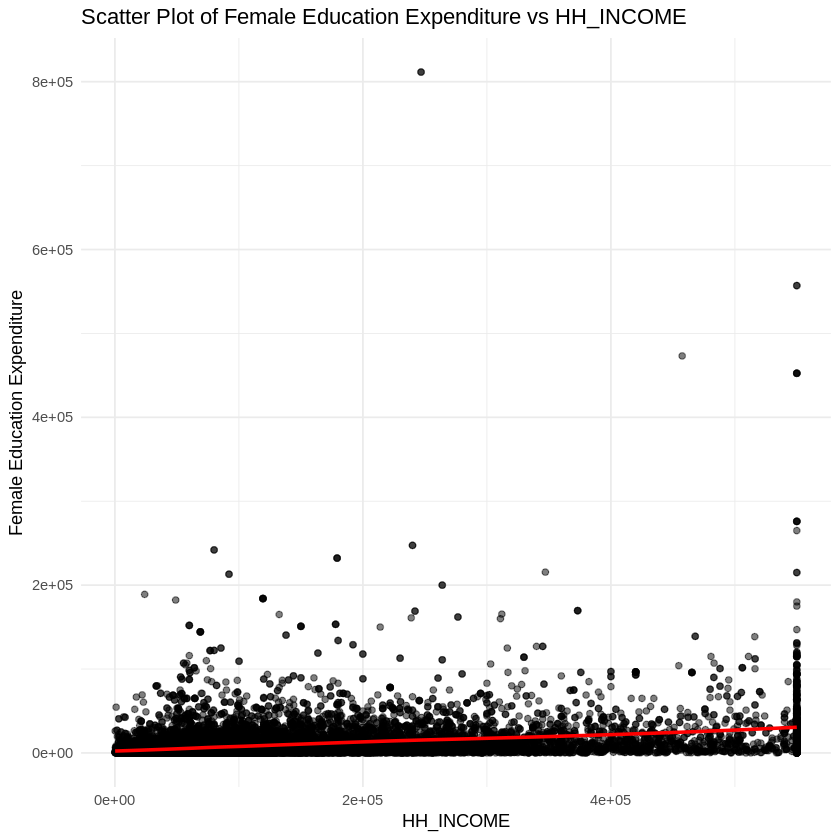

`geom_smooth()` using formula = 'y ~ x'


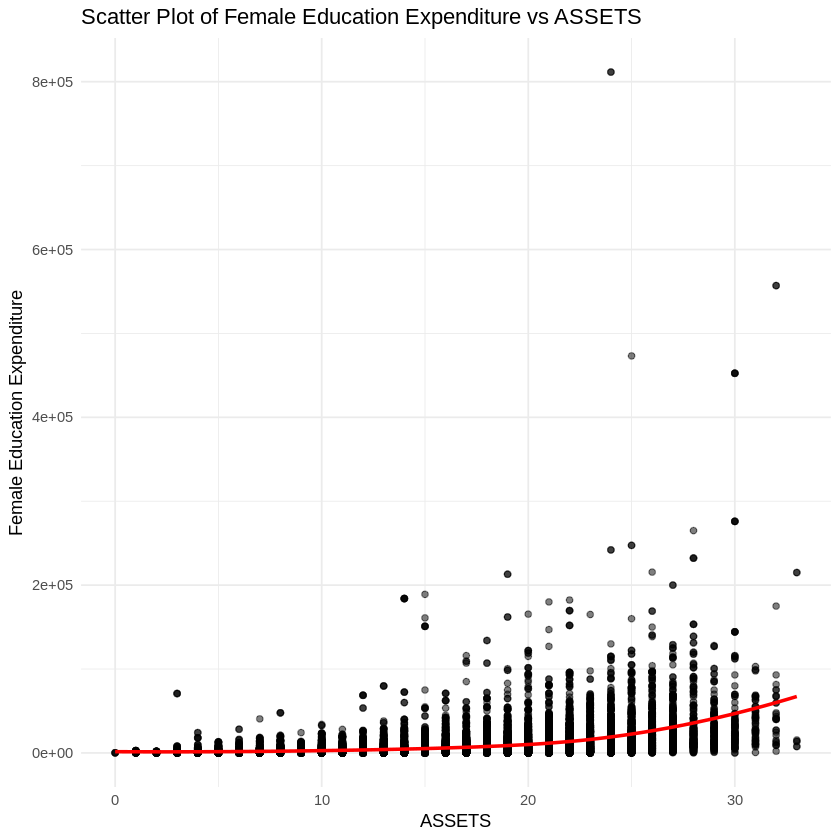

`geom_smooth()` using formula = 'y ~ x'


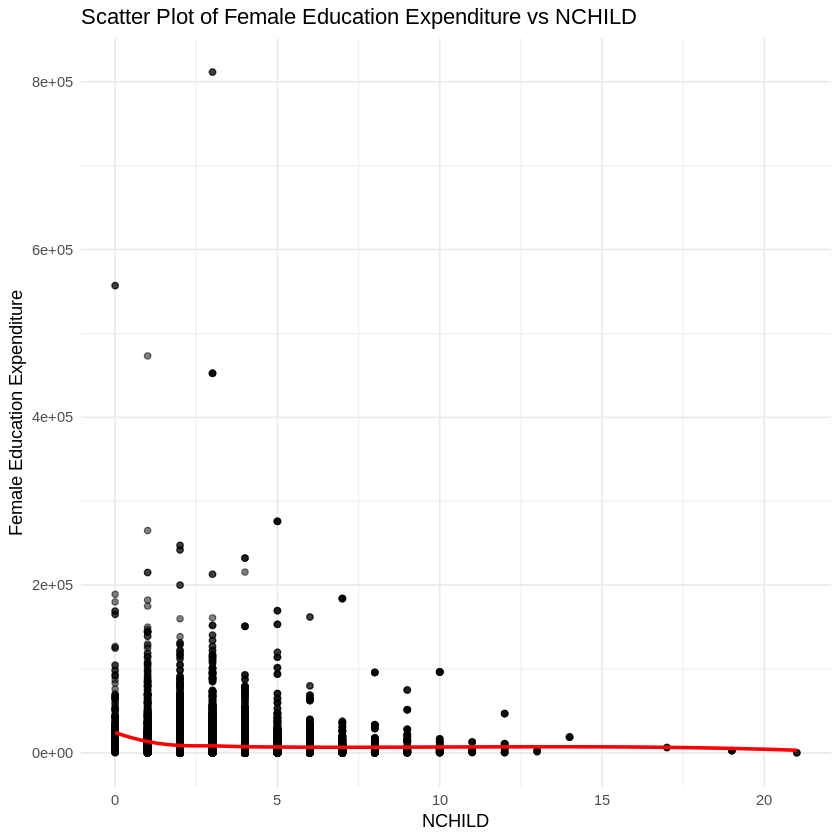

`geom_smooth()` using formula = 'y ~ x'


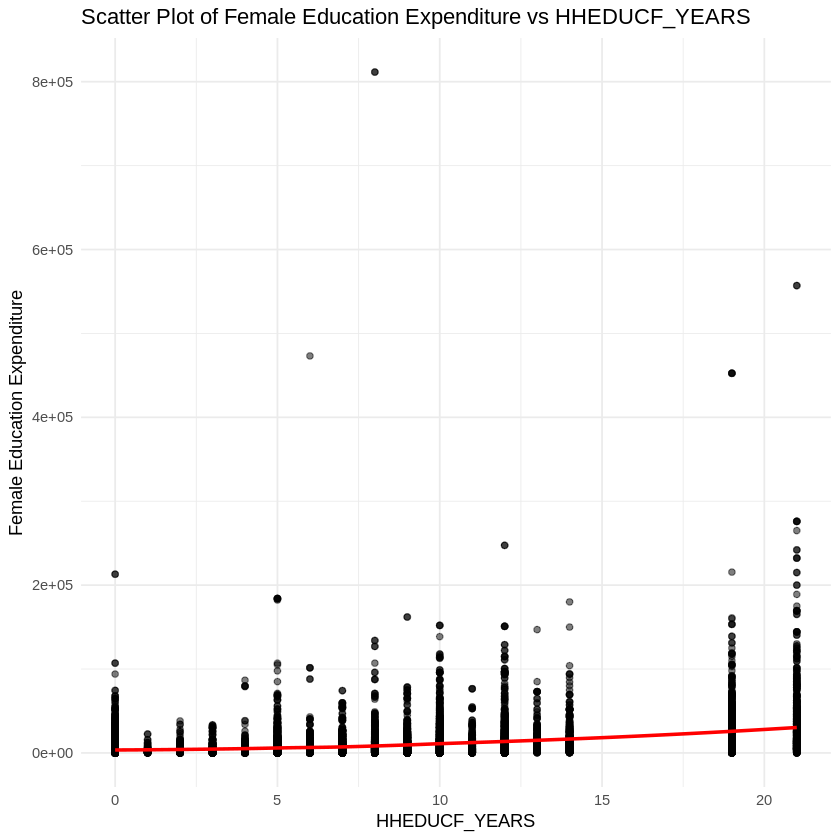

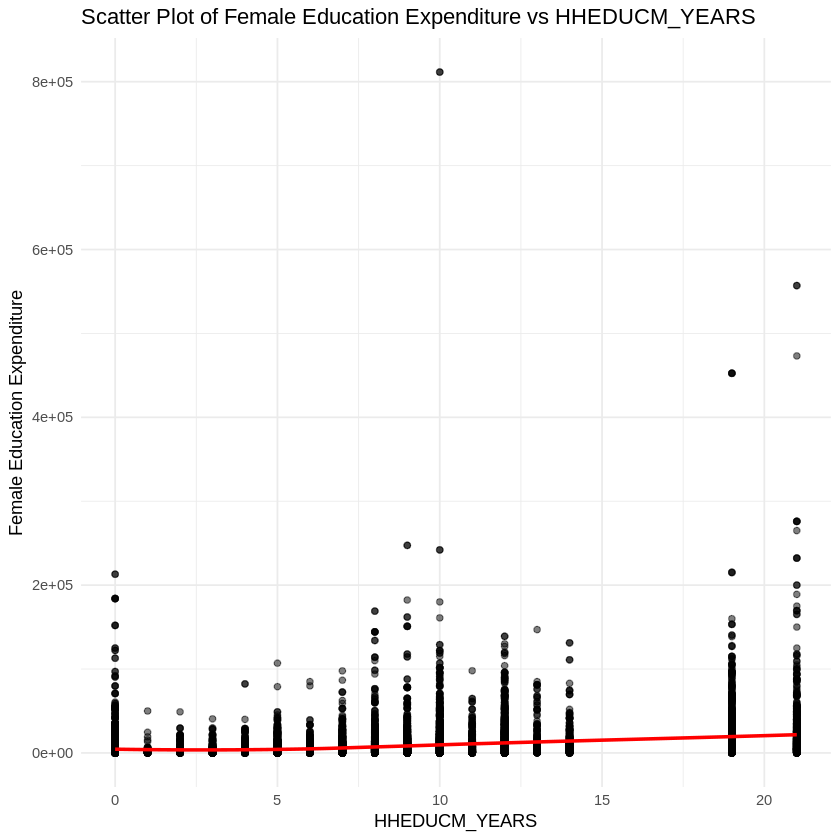

In [ ]:
library(ggplot2)

# Scatter plots to check for non-linearity
variables <- c("HH_INCOME", "ASSETS", "NCHILD", "HHEDUCF_YEARS", "HHEDUCM_YEARS")

# Loop through selected variables and create scatter plots
for (var in variables) {
  p <- ggplot(hh, aes(x = !!sym(var), y = female_edu_exp)) +
    geom_point(alpha = 0.5) +  # Transparency for better visibility
    geom_smooth(method = "loess", color = "red", se = FALSE) +  # Trend line
    labs(title = paste("Scatter Plot of Female Education Expenditure vs", var),
         x = var, y = "Female Education Expenditure") +
    theme_minimal()

  print(p)  # Display plot
}

In [ ]:
write_csv(hh, "hh_final.csv")


In [ ]:
x_variables <- hh %>%
  select_if(is.numeric) %>%
  select(-female_edu_exp)

# Calculate the correlation matrix
correlation_matrix <- cor(x_variables)

# Print the correlation matrix
correlation_matrix

,HH_INCOME,URBAN2011,ASSETS,NCHILD,HHEDUCF_YEARS,HHEDUCM_YEARS,RELIGION_MUSLIM,RELIGION_CHRISTIAN_SIKH,RELIGION_OTHER,CASTE_GENERAL,CASTE_SC_ST_OTHERS
HH_INCOME,1.0000000000,0.22147928,0.563160936,-0.0008941726,0.44068375,0.4493415769,-0.02702702,0.11936537,0.0040797173,0.19086649,-0.11883066
URBAN2011,0.2214792792,1.00000000,0.477881837,-0.1593306749,0.33164797,0.2410565522,0.09286577,-0.01154076,0.0110499089,0.09592631,-0.10098334
ASSETS,0.5631609355,0.47788184,1.000000000,-0.2062623834,0.60198692,0.5248255612,-0.02092215,0.14382767,0.0073881488,0.25141210,-0.21347734
NCHILD,-0.0008941726,-0.15933067,-0.206262383,1.0000000000,-0.26710274,-0.1278916409,0.17595785,-0.07131355,-0.0383958381,-0.08743252,0.01177056
HHEDUCF_YEARS,0.4406837530,0.33164797,0.601986922,-0.2671027446,1.00000000,0.5500783813,-0.06824269,0.10297811,0.0266885282,0.24640555,-0.16705222
HHEDUCM_YEARS,0.4493415769,0.24105655,0.524825561,-0.1278916409,0.55007838,1.0000000000,-0.08046211,0.02833326,0.0005930454,0.20884345,-0.15763614
RELIGION_MUSLIM,-0.0270270174,0.09286577,-0.020922149,0.1759578491,-0.06824269,-0.0804621075,1.00000000,-0.09402258,-0.0462207209,0.15739657,-0.22948032
RELIGION_CHRISTIAN_SIKH,0.1193653671,-0.01154076,0.143827666,-0.0713135550,0.10297811,0.0283332636,-0.09402258,1.00000000,-0.0260192445,0.03707741,0.07424966
RELIGION_OTHER,0.0040797173,0.01104991,0.007388149,-0.0383958381,0.02668853,0.0005930454,-0.04622072,-0.02601924,1.0000000000,-0.03169836,0.11607407
CASTE_GENERAL,0.1908664921,0.09592631,0.251412097,-0.0874325213,0.24640555,0.2088434503,0.15739657,0.03707741,-0.0316983605,1.00000000,-0.42124951


In [ ]:
hh$log_female_edu_exp <- log(hh$female_edu_exp + 1)

In [ ]:
nrow(hh)

[1] 24071

In [ ]:
model <- lm( log_female_edu_exp ~  URBAN2011 +HH_INCOME+ASSETS+ NCHILD+
               HHEDUCF_YEARS +
            HHEDUCM_YEARS + RELIGION_MUSLIM +
             RELIGION_CHRISTIAN_SIKH +RELIGION_OTHER +
             CASTE_GENERAL+ CASTE_SC_ST_OTHERS, data = hh)

summary(model)


Call:
lm(formula = log_female_edu_exp ~ URBAN2011 + HH_INCOME + ASSETS + 
    NCHILD + HHEDUCF_YEARS + HHEDUCM_YEARS + RELIGION_MUSLIM + 
    RELIGION_CHRISTIAN_SIKH + RELIGION_OTHER + CASTE_GENERAL + 
    CASTE_SC_ST_OTHERS, data = hh)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5443  -0.6365   0.2367   0.9976   4.6662 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              5.374e+00  4.421e-02 121.544  < 2e-16 ***
URBAN2011                1.687e-01  2.661e-02   6.340 2.33e-10 ***
HH_INCOME                4.467e-07  1.112e-07   4.017 5.91e-05 ***
ASSETS                   1.061e-01  2.603e-03  40.751  < 2e-16 ***
NCHILD                   7.133e-02  6.922e-03  10.305  < 2e-16 ***
HHEDUCF_YEARS            4.958e-02  2.447e-03  20.258  < 2e-16 ***
HHEDUCM_YEARS            1.788e-02  2.290e-03   7.810 5.97e-15 ***
RELIGION_MUSLIM         -2.286e-01  3.346e-02  -6.832 8.55e-12 ***
RELIGION_CHRISTIAN_SIKH  1.600e-01  5.16

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


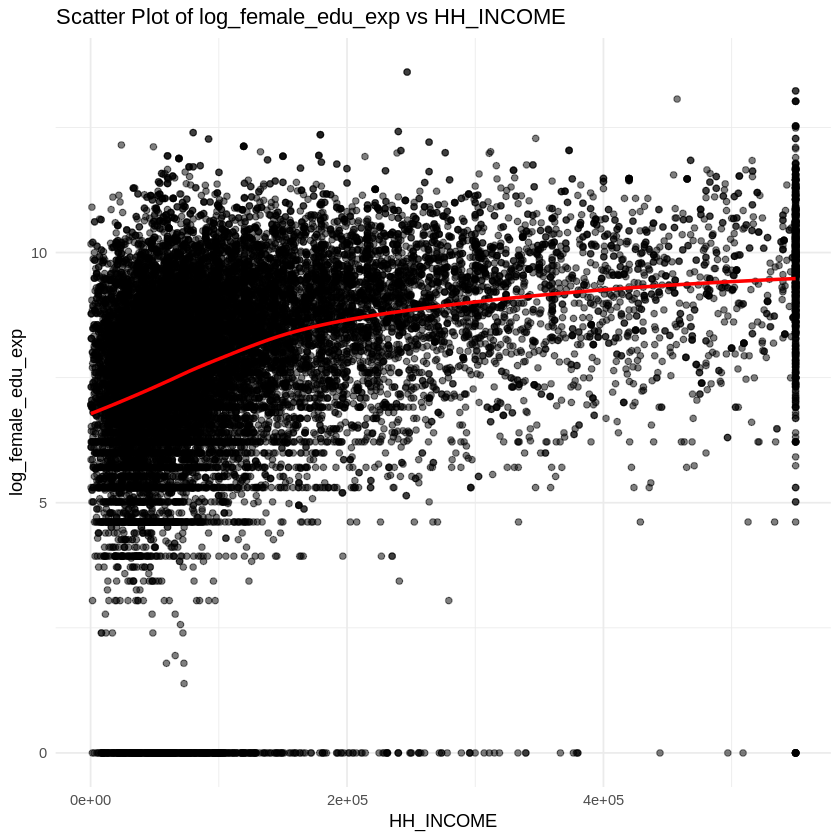

`geom_smooth()` using formula = 'y ~ x'


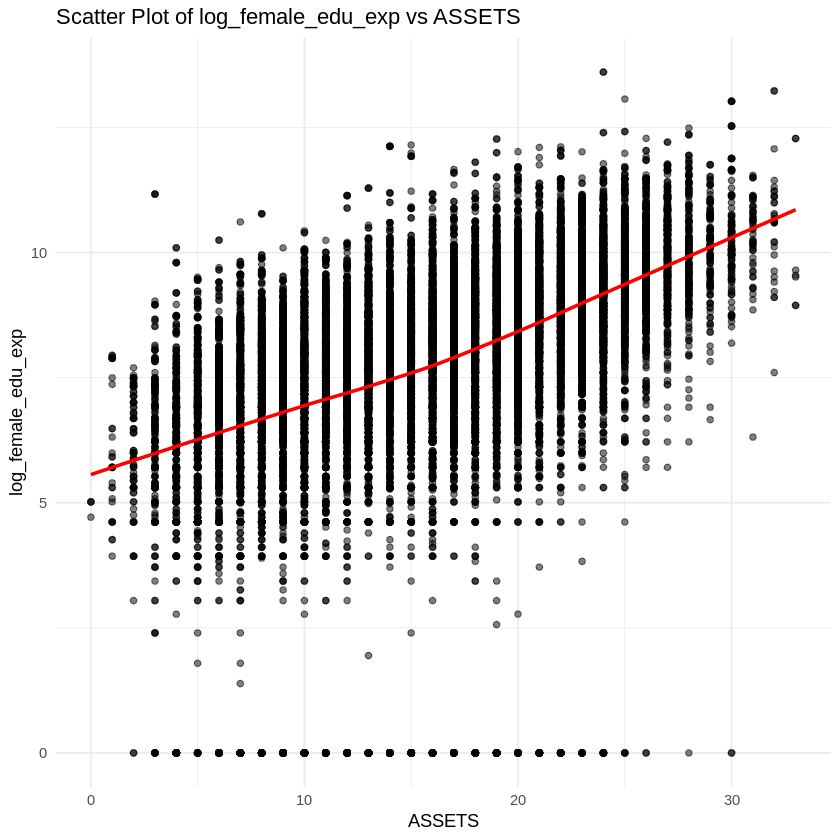

`geom_smooth()` using formula = 'y ~ x'


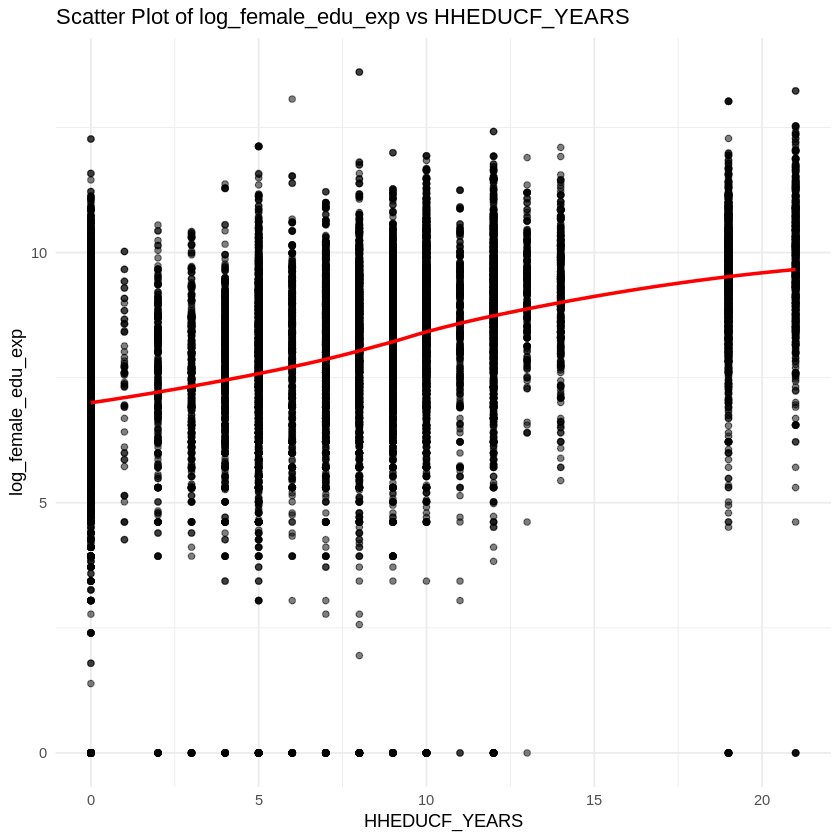

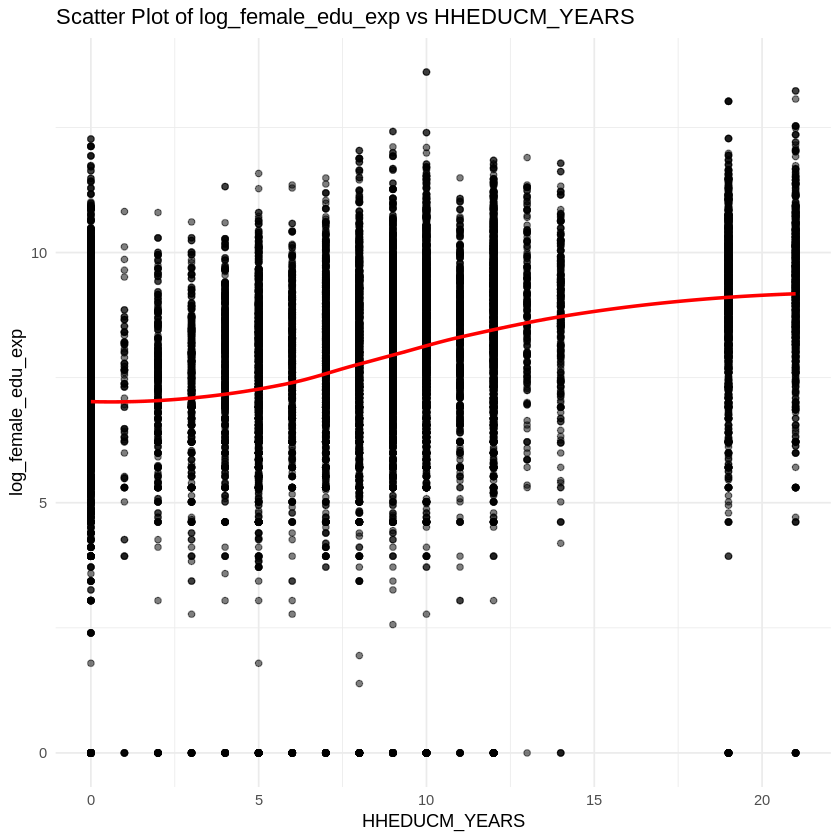

In [ ]:
variables <- c("HH_INCOME", "ASSETS","HHEDUCF_YEARS",
            "HHEDUCM_YEARS")

for (var in variables) {
  p <- ggplot(hh, aes_string(x = var, y = "log_female_edu_exp")) +
    geom_point(alpha = 0.5) +
    geom_smooth(method = "loess", color = "red", se = FALSE) +
    labs(title = paste("Scatter Plot of log_female_edu_exp vs", var),
         x = var, y = "log_female_edu_exp") +
    theme_minimal()
  print(p)
}

In [ ]:
# multicollinearity test for model
vif_values <- vif(model)
print(vif_values)
high_vif_variables <- names(vif_values[vif_values > 5])

if (length(high_vif_variables) > 0) {
  cat("Variables with high VIFs (potential multicollinearity):\n")
  print(high_vif_variables)
} else {
  cat("No variables with high VIFs detected.\n")
}

              URBAN2011               HH_INCOME                  ASSETS 
               1.350313                1.612307                2.378540 
                 NCHILD           HHEDUCF_YEARS           HHEDUCM_YEARS 
               1.161586                1.899289                1.644165 
        RELIGION_MUSLIM RELIGION_CHRISTIAN_SIKH          RELIGION_OTHER 
               1.144061                1.060502                1.019145 
          CASTE_GENERAL      CASTE_SC_ST_OTHERS 
               1.302142                1.316053 
No variables with high VIFs detected.


HETEROSCEDASTICITY


In [ ]:
bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 164.89, df = 11, p-value < 2.2e-16


In [ ]:
robust_se <- coeftest(model, vcov = vcovHC(model, type = "HC3"))
robust_se


t test of coefficients:

                           Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept)              5.3738e+00  4.3713e-02 122.9354 < 2.2e-16 ***
URBAN2011                1.6872e-01  2.6635e-02   6.3347 2.420e-10 ***
HH_INCOME                4.4665e-07  1.0345e-07   4.3175 1.584e-05 ***
ASSETS                   1.0607e-01  2.6223e-03  40.4502 < 2.2e-16 ***
NCHILD                   7.1334e-02  6.5464e-03  10.8968 < 2.2e-16 ***
HHEDUCF_YEARS            4.9579e-02  2.3772e-03  20.8562 < 2.2e-16 ***
HHEDUCM_YEARS            1.7880e-02  2.1963e-03   8.1409 4.112e-16 ***
RELIGION_MUSLIM         -2.2862e-01  3.5438e-02  -6.4514 1.129e-10 ***
RELIGION_CHRISTIAN_SIKH  1.6001e-01  4.9969e-02   3.2022  0.001366 ** 
RELIGION_OTHER           1.5691e-01  9.0896e-02   1.7262  0.084320 .  
CASTE_GENERAL            1.4954e-01  2.6319e-02   5.6818 1.349e-08 ***
CASTE_SC_ST_OTHERS      -1.2806e-01  2.8340e-02  -4.5188 6.247e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.0